In [1]:
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
from scipy.misc import toimage

## Testing fast sorting by fitness

In [61]:
a = np.random.rand(3, 3 , 2)
a[:,:,1]

array([[0.05560872, 0.3599264 , 0.65992936],
       [0.44620118, 0.3727347 , 0.38500076],
       [0.43054389, 0.9895299 , 0.45325168]])

In [62]:
meansFitnessGenotypes = np.mean(a[:,:,1], axis=0)
print("meansFitnessGenotypes: ", meansFitnessGenotypes)

meansFitnessGenotypes:  [0.31078459 0.57406366 0.49939393]


In [63]:
a[:, np.argsort(-meansFitnessGenotypes), :][:,:,1]

array([[0.3599264 , 0.65992936, 0.05560872],
       [0.3727347 , 0.38500076, 0.44620118],
       [0.9895299 , 0.45325168, 0.43054389]])

In [5]:
testA = np.random.rand(1000, 10000 , 2)
%timeit -n5000 np.array([b[np.argsort(-b[:,1])] for b in a])

22.9 µs ± 663 ns per loop (mean ± std. dev. of 7 runs, 5000 loops each)


In [6]:
a[:,np.argsort(-a[:, : ,1])][0]

array([[[0.67313895, 0.64687308],
        [0.77480788, 0.34920783],
        [0.35650924, 0.04234912]],

       [[0.35650924, 0.04234912],
        [0.77480788, 0.34920783],
        [0.67313895, 0.64687308]],

       [[0.67313895, 0.64687308],
        [0.77480788, 0.34920783],
        [0.35650924, 0.04234912]]])

In [7]:
a[:, : ,1]

array([[0.04234912, 0.34920783, 0.64687308],
       [0.60927459, 0.340141  , 0.25490451],
       [0.56376876, 0.73134451, 0.96616684]])

## Testing Crossing over GA

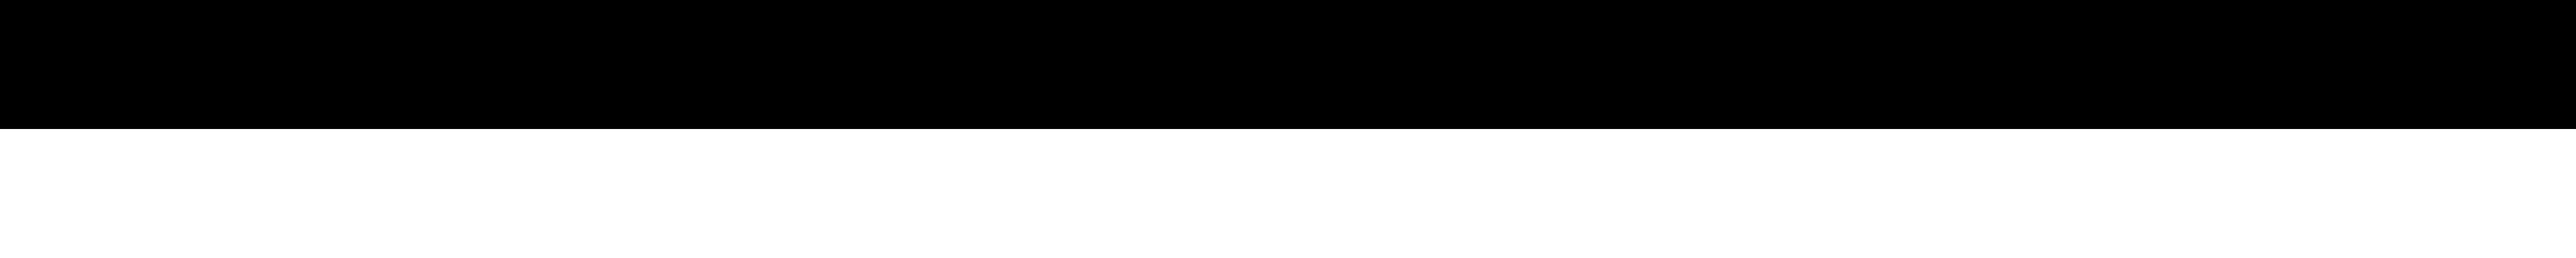

In [8]:
a1 = np.zeros(10)
a2 = np.ones(10)
x = np.random.randint(1, a1.size)
Image.fromarray(np.array([a1*255, a2*255])).resize((5000, 500)).convert("RGB")

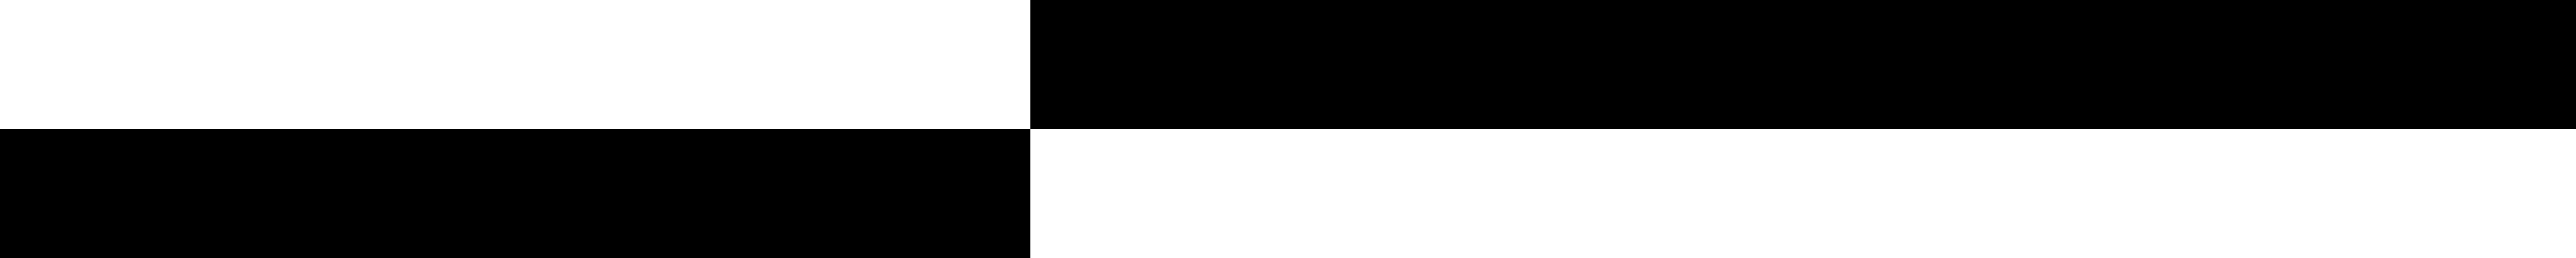

In [9]:
a1[:x], a2[:x] = a2[:x], a1[:x].copy()
Image.fromarray(np.array([a1*255, a2*255])).resize((5000, 500)).convert("RGB")

# Recombine

## Crossing over

In [10]:
def initAlphaO(n = 7, m = 8):
    vchr = np.vectorize(chr)
    pad = 65
    return vchr(np.arange(pad, n*m+pad).reshape((m,n)).T)
def initNumO(n = 7, m = 8):
    return np.arange(n*m).reshape((m,n)).T
initAlphaO()

array([['A', 'H', 'O', 'V', ']', 'd', 'k', 'r'],
       ['B', 'I', 'P', 'W', '^', 'e', 'l', 's'],
       ['C', 'J', 'Q', 'X', '_', 'f', 'm', 't'],
       ['D', 'K', 'R', 'Y', '`', 'g', 'n', 'u'],
       ['E', 'L', 'S', 'Z', 'a', 'h', 'o', 'v'],
       ['F', 'M', 'T', '[', 'b', 'i', 'p', 'w'],
       ['G', 'N', 'U', '\\', 'c', 'j', 'q', 'x']], dtype='<U1')

In [11]:
def random_derangement(N):
    original = np.arange(N)
    new = np.random.permutation(N)
    same = np.where(original == new)[0]
    while len(same) != 0:
        swap = same[np.random.permutation(len(same))]
        new[same] = new[swap]
        same = np.where(original == new)[0]
        if len(same) == 1:
            swap = np.random.randint(0, N)
            new[[same[0], swap]] = new[[swap, same[0]]]
    return new

def normalTrucatedSingle(n):
    nrml = np.random.normal(n*0.5, n*0.33)
    if nrml < 0:
        return 0
    elif nrml >= n:
        return n-1
    return nrml
def normalTrucatedMultiple(n, size=1):
    return np.random.normal(n*0.5, n*0.33, size=size).astype(int).clip(0, n-1)

In [12]:
#pairs = np.random.permutation(m)
O = initAlphaO()
n, m = O.shape
pairs = random_derangement(m)
pairs

array([6, 7, 3, 0, 1, 2, 4, 5])

In [13]:
# Middle | Ignores half for crossing over
x = int(n/2)
# Uniform | Okay but in nature crossing over isn't uniform
x = np.random.randint(n)
# Uniform Middle | Better, but still ignores the extremis
x = np.random.randint(int(n/2 - n/4), int(n/2 + n/4))
# Normal | Better, but small proba that x >= n or x < 0
x = int(np.random.normal(n*0.5, n*0.33))
# Normal truncated | Best solution, fits nature, but rather costly
import scipy.stats as stats
x = int(stats.truncnorm(-1.5, 3-((3+n)/n), loc=n/2, scale=n*0.3).rvs(1)[0])
old = O.copy()
crossIndices = normalTrucatedMultiple(n, m)
for p1, p2 in zip(range(m), pairs):
    x = crossIndices[p1]
    O[:, p1][:x], O[:, p2][:x] = O[:, p2][:x], O[:, p1][:x].copy()
    print("", old[:, p1], " ==> ", O[:, p1], "\n", old[:, p2], " ==> ", O[:, p2])
    print("-"*28, "Cross at ", x, "-"*28)
pairs = random_derangement(m)

 ['A' 'B' 'C' 'D' 'E' 'F' 'G']  ==>  ['k' 'B' 'C' 'D' 'E' 'F' 'G'] 
 ['k' 'l' 'm' 'n' 'o' 'p' 'q']  ==>  ['A' 'l' 'm' 'n' 'o' 'p' 'q']
---------------------------- Cross at  1 ----------------------------
 ['H' 'I' 'J' 'K' 'L' 'M' 'N']  ==>  ['r' 's' 't' 'u' 'v' 'M' 'N'] 
 ['r' 's' 't' 'u' 'v' 'w' 'x']  ==>  ['H' 'I' 'J' 'K' 'L' 'w' 'x']
---------------------------- Cross at  5 ----------------------------
 ['O' 'P' 'Q' 'R' 'S' 'T' 'U']  ==>  ['V' 'W' 'Q' 'R' 'S' 'T' 'U'] 
 ['V' 'W' 'X' 'Y' 'Z' '[' '\\']  ==>  ['O' 'P' 'X' 'Y' 'Z' '[' '\\']
---------------------------- Cross at  2 ----------------------------
 ['V' 'W' 'X' 'Y' 'Z' '[' '\\']  ==>  ['O' 'P' 'X' 'Y' 'Z' '[' '\\'] 
 ['A' 'B' 'C' 'D' 'E' 'F' 'G']  ==>  ['k' 'B' 'C' 'D' 'E' 'F' 'G']
---------------------------- Cross at  0 ----------------------------
 [']' '^' '_' '`' 'a' 'b' 'c']  ==>  ['r' 's' 't' 'u' 'v' 'b' 'c'] 
 ['H' 'I' 'J' 'K' 'L' 'M' 'N']  ==>  [']' '^' '_' '`' 'a' 'M' 'N']
---------------------------- Cross at  5 

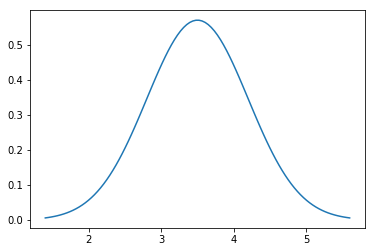

In [14]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

mu = n/2
sigma = n/10
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [15]:
a = normalTrucatedMultiple(n, 10000)
a.max(), a.min()

(6, 0)

## Mutation

In [16]:
O = initNumO()
O

array([[ 0,  7, 14, 21, 28, 35, 42, 49],
       [ 1,  8, 15, 22, 29, 36, 43, 50],
       [ 2,  9, 16, 23, 30, 37, 44, 51],
       [ 3, 10, 17, 24, 31, 38, 45, 52],
       [ 4, 11, 18, 25, 32, 39, 46, 53],
       [ 5, 12, 19, 26, 33, 40, 47, 54],
       [ 6, 13, 20, 27, 34, 41, 48, 55]])

In [17]:
n, quarterCount = O.shape
percentToMutate = 0.2

countToMutate = int( quarterCount*n * percentToMutate)
random_i = np.random.choice(n, countToMutate, replace=True)
random_j = np.random.choice(quarterCount, countToMutate, replace=True)
O.shape

(7, 8)

In [18]:
random_i, random_j

(array([3, 1, 6, 5, 5, 2, 5, 2, 1, 0, 4]),
 array([0, 7, 3, 6, 5, 0, 5, 0, 5, 2, 5]))

# Permutate marked weights in a row ( population)

In [19]:
markedForPermutation = np.random.rand(30).round().astype(int)
markedForPermutation

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0])

In [20]:
%timeit -n10000 markedForPermutation.sum()

1.83 µs ± 169 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [21]:
%timeit -n10000 np.count_nonzero(markedForPermutation)

1.93 µs ± 97.4 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [22]:
import collections
%timeit -n10000 collections.Counter(markedForPermutation)[1]

6.12 µs ± 243 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [23]:
np.where(markedForPermutation)[0]

array([ 0,  1,  2,  4,  5,  6,  8, 11, 13, 14, 16, 21, 23, 26])

In [24]:
def permuteMarked(P, markedForPermutation, i):
    P_permuted = P.copy()
    rowMarkers = markedForPermutation[i,:]
    # Pairs of genes to permutate in the row i
    pairs = random_derangement(int(rowMarkers.sum()))
    indicesOfNotNull = np.where(rowMarkers)[0]
    for p1, p2 in zip(indicesOfNotNull, indicesOfNotNull[pairs]):
        # p1 is the starting index to permute
        # p2 is the final index where p1 is going
        P_permuted[i, p1], P_permuted[i, p2] = P[i, p2], P[i, p1]
    return P_permuted

In [25]:
n = 7
m = 8
P = initNumO(m, n).T
P

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55]])

In [26]:
def initMarkedForPermutation(n,m):
    markedForPermutation = np.zeros((n, m))
    for i in range(n):
        for j in range(i&1, m, 2):
            markedForPermutation[i,j] = 1
    return markedForPermutation

In [27]:
n = 7
m = 8

markedForPermutation = initMarkedForPermutation(n,m)
print("markedForPermutation: \n", markedForPermutation, '\n', '-'*30)
P = initNumO(m, n).T
P = permuteMarked(P, markedForPermutation, 1)
#permuteMarked(P, markedForPermutation, 3)
#permuteMarked(P, markedForPermutation, 5)
print ("P after \n", P, '\n', '-'*30)

markedForPermutation: 
 [[1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]] 
 ------------------------------
P after 
 [[ 0  1  2  3  4  5  6  7]
 [ 8 11 10  9 12 15 14 13]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55]] 
 ------------------------------


# Weight matrix generation

In [28]:
np.split([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [2, 4, 6, 8])

[array([0, 1]),
 array([2, 3]),
 array([4, 5]),
 array([6, 7]),
 array([ 8,  9, 10])]

In [29]:
psi = [1,3,5,7,5,2]
matrixSizes = lambda psi : [psi[i - 1] * psi[i] for i in range(1, len(psi))]
m = lambda psi : sum(matrixSizes(psi))
X = np.array(np.arange(m(psi)))
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97])

In [30]:
sizes = matrixSizes(psi)
# Can be done inline but I don't feel like it
def calcIndices(sizes, indices=[0]):
    if len(sizes) == 0:
        return indices[1:-1]
    indices.append(indices[-1] + sizes[0])
    return calcIndices(sizes[1:], indices)
indices = calcIndices(sizes)
print(indices)

[3, 18, 53, 88]


In [31]:
M = np.split(X,[i for i in indices])
M

[array([0, 1, 2]),
 array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52]),
 array([53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
        70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
        87]),
 array([88, 89, 90, 91, 92, 93, 94, 95, 96, 97])]

In [32]:
[M[i].shape for i in range(len(M))]

[(3,), (15,), (35,), (35,), (10,)]

In [33]:
weightMatrices = []
print('input --> ', end='')
for weights, layerIndex in zip(M, range(1, len(psi))):
    weightMatrices.append(weights.reshape(psi[layerIndex-1], psi[layerIndex]))
    print(weightMatrices[-1].shape, end=' --> ')
print('output')

input --> (1, 3) --> (3, 5) --> (5, 7) --> (7, 5) --> (5, 2) --> output


## Full weights matrix generation algorithm

In [34]:
def calcSplittingIndices(sizes, indices=[0]):
        if len(sizes) == 0:
            return indices[1:-1]
        indices.append(indices[-1] + sizes[0])
        return calcIndices(sizes[1:], indices)

def constructWeightMatrices(X, psi):
    matricesElementCount = lambda psi : [psi[i - 1] * psi[i] for i in range(1, len(psi))]
    
    M = np.split(X, np.cumsum(matricesElementCount(psi))[:-1])

    weightMatrices = []
    for weights, layerIndex in zip(M, range(1, len(psi))):
        weightMatrices.append(weights.reshape(psi[layerIndex-1], psi[layerIndex]))
        
    return weightMatrices

psi = [1,3,5,7,5,2]
X = np.array(np.arange(m(psi)))
weightMatrices = constructWeightMatrices(X, psi)
print('inputs', end=' ==> ')
for wm in weightMatrices:
    print(wm.shape, end=' ==> ')
print('outputs')

inputs ==> (1, 3) ==> (3, 5) ==> (5, 7) ==> (7, 5) ==> (5, 2) ==> outputs


In [35]:
L = [1,2,3,8,4,5]

In [36]:
L.append(6)

In [37]:
L

[1, 2, 3, 8, 4, 5, 6]

In [38]:
def calcIndices(sizes, indices=[0]):
    if len(sizes) == 0:
        return indices[1:-1]
    return calcIndices(sizes[1:], indices + [indices[-1] + sizes[0]])

In [39]:
calcIndices([10, 11, 12, 13, 14, 15])

[10, 21, 33, 46, 60]

In [40]:
np.cumsum([10, 11, 12, 13, 14, 15])[:-1]

array([10, 21, 33, 46, 60])

In [41]:
%timeit -n3000 np.cumsum(matrixSizes(psi))[:-1]

9.29 µs ± 864 ns per loop (mean ± std. dev. of 7 runs, 3000 loops each)


In [42]:
%timeit -n300 calcSplittingIndices(matrixSizes(psi))

The slowest run took 5.65 times longer than the fastest. This could mean that an intermediate result is being cached.
16.8 µs ± 7.86 µs per loop (mean ± std. dev. of 7 runs, 300 loops each)


In [43]:
fitnesses = np.array([1,2,3,4,5,6])
print(fitnesses.mean())
fitnesses2 = np.array([1,2,3,4,5,6,7])
fitnesses2.mean()

3.5


4.0

In [44]:
m1 = fitnesses.mean()
n = len(fitnesses)

In [45]:
%timeit -n 90000 (n*m1+7)/(n+1)

518 ns ± 25.7 ns per loop (mean ± std. dev. of 7 runs, 90000 loops each)


In [46]:
%timeit -n 90000 (7-m1)/(n+1) + m1

401 ns ± 11.9 ns per loop (mean ± std. dev. of 7 runs, 90000 loops each)


In [47]:
n = 40
currentGeneration = 6
X = np.array([3.5]*n).reshape(n,1)
X_fitness = 7

In [48]:
%timeit -n 90000 (X_fitness-X)/(currentGeneration+1) + X

2.41 µs ± 81.2 ns per loop (mean ± std. dev. of 7 runs, 90000 loops each)


In [49]:
n = 6
m = 8
P = np.arange(n*m*2).reshape(n,m,2)
X = P[:,3]
X[:,0]

array([ 6, 22, 38, 54, 70, 86])

In [ ]:
random_derangement(2)

In [57]:
%timeit -n300 print('12345')

12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
12345
1234